# Week 6 Day 1 - EDA

1. **Data Collection**
2. **Data Cleaning**
3. **Univariate Analysis**
4. Bivariate Analysis
5. Multivariate Analysis
6. Time Series Data
7. Dealing with Outliers and Missing Values

### Titanic dataset
https://www.kaggle.com/c/titanic/data

This datset was made for machine learning but provides some very interesting visualizations. I renamed the 'training' set as 'passengers' and  'gender_submission' file as 'survived'

In [4]:
import pandas as pd

#### Data Collection

In [5]:
#reading files

#df = pd.read_csv

passengersDF = pd.read_csv("passengers.csv")
survivedDF = pd.read_csv("survived.csv")


In [6]:
passengersDF.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
survivedDF.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


#### Data Cleaning

In [9]:
#merge the two files

titanicDF = pd.merge(survivedDF,passengersDF, on = "PassengerId")
titanicDF

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
418,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
419,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
420,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
421,1308,0,3,"Ware, Mr. Frederick",man,NaN,0,0,359309,8.0500,NaN,S


In [10]:
#get the info

titanicDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 422
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  423 non-null    int64  
 1   Survived     423 non-null    int64  
 2   Pclass       423 non-null    int64  
 3   Name         423 non-null    object 
 4   Sex          423 non-null    object 
 5   Age          337 non-null    float64
 6   SibSp        423 non-null    int64  
 7   Parch        423 non-null    int64  
 8   Ticket       423 non-null    object 
 9   Fare         422 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     423 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 43.0+ KB


In [12]:
#get the datatypes

titanicDF.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [39]:
#copy the dataframe

titanicCopy = titanicDF.copy()

In [14]:
# we have values that are not numbers

titanicCopy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Check for Duplicates**

subset : List of column names to check for duplication.

keep : Whether to keep first('first'), last('last'), or all (Flase) duplicate values

In [40]:
#.duplicated()

titanicCopy.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
418    False
419    False
420    False
421    False
422    False
Length: 423, dtype: bool

In [41]:
#make a new df with the duplicates

columnNames = ['PassengerId','Name']
duplicates = titanicCopy.duplicated(subset = columnNames, keep=False)

In [42]:
#get the duplicates lable
titanicCopy[duplicates]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
20,911,1,3,"Assaf Khalil, Mrs. Mariana (Miriam"")""",female,45.0,0,0,2696,7.2250,NaN,C
21,911,1,3,"Assaf Khalil, Mrs. Mariana (Miriam"")""",female,45.0,0,0,2696,7.2250,NaN,C
369,1259,1,3,"Riihivouri, Miss. Susanna Juhantytar Sanni""""",female,22.0,0,0,3101295,39.6875,NaN,S
370,1259,1,3,"Riihivouri, Miss. Susanna Juhantytar Sanni""""",female,22.0,0,0,3101295,39.6875,NaN,S
395,1284,0,3,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.2500,NaN,S
396,1284,0,3,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.2500,NaN,S
407,1295,0,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,113059,47.1000,NaN,S
408,1295,0,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,113059,47.1000,NaN,S


In [43]:
# Drop duplicates

titanicCopy.drop_duplicates(inplace=True)

In [44]:
# get duplicates table again

titanicCopy[duplicates]

C:\Users\dcdol\AppData\Local\Temp\ipykernel_24604\895416991.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  titanicCopy[duplicates]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
20,911,1,3,"Assaf Khalil, Mrs. Mariana (Miriam"")""",female,45.0,0,0,2696,7.2250,NaN,C
369,1259,1,3,"Riihivouri, Miss. Susanna Juhantytar Sanni""""",female,22.0,0,0,3101295,39.6875,NaN,S
395,1284,0,3,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.2500,NaN,S
407,1295,0,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,113059,47.1000,NaN,S


In [45]:
#get info

titanicDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 422
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  423 non-null    int64  
 1   Survived     423 non-null    int64  
 2   Pclass       423 non-null    int64  
 3   Name         423 non-null    object 
 4   Sex          423 non-null    object 
 5   Age          337 non-null    float64
 6   SibSp        423 non-null    int64  
 7   Parch        423 non-null    int64  
 8   Ticket       423 non-null    object 
 9   Fare         422 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     423 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 59.1+ KB


**Value Consistancy**

In [46]:
#gender value counts
titanicCopy['Sex'].value_counts()

male      259
female    146
Male        5
Female      3
woman       3
man         2
Name: Sex, dtype: int64

In [47]:
#1 set to lower case

titanicCopy['sex'] = titanicCopy['Sex'].str.lower()
titanicCopy['sex'].value_counts()

male      264
female    149
woman       3
man         2
Name: sex, dtype: int64

In [48]:
#replace the other words
titanicCopy['sex'] = titanicCopy['sex'].str.replace("woman",'female')
titanicCopy['sex'] = titanicCopy['sex'].str.replace("man",'male')
titanicCopy['sex'].value_counts()


male      266
female    152
Name: sex, dtype: int64

We only want whole round numbers - integers

In [34]:
#convert the age to integer
titanicCopy['Age'].unique()

array([34.5 , 47.  , 62.  , 27.  , 22.  , 14.  , 30.  , 26.  , 18.  ,
       21.  ,   nan, 46.  , 23.  , 63.  , 24.  , 35.  , 45.  , 55.  ,
        9.  , 48.  , 50.  , 22.5 , 41.  , 33.  , 18.5 , 25.  , 39.  ,
       60.  , 36.  , 20.  , 28.  , 10.  , 17.  , 32.  , 13.  , 31.  ,
       29.  , 28.5 , 32.5 ,  6.  , 67.  , 49.  ,  2.  , 76.  , 43.  ,
       16.  ,  1.  , 12.  , 42.  , 53.  , 26.5 , 40.  , 61.  , 60.5 ,
        7.  , 15.  , 54.  , 64.  , 37.  , 34.  , 11.5 ,  8.  ,  0.33,
       38.  , 57.  , 40.5 ,  0.92, 19.  , 36.5 ,  0.75,  0.83, 58.  ,
        0.17, 59.  , 14.5 , 44.  ,  5.  , 51.  ,  3.  , 38.5 ])

it is important taht we have nan values for now

In [ ]:
#get the na ones to be an integer

#titanicCopy['Age'] = titanicCopy['Age'].notna().astype('Int64')

In [57]:
import numpy as np

In [58]:
titanicCopy['Age'] = titanicCopy['Age'] .replace('nan',np.nan)

In [59]:
#check the age

titanicCopy[nullAge]['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
414     3.0
416    37.0
417    28.0
419    39.0
420    38.5
Name: Age, Length: 332, dtype: float64

now we need to reset the Df back to what it was originally

In [60]:
#round them to the 0th position
titanicCopy['Age'] = titanicCopy['Age'].round(0)

In [61]:
#check unique

titanicCopy['Age'].unique()

array([34., 47., 62., 27., 22., 14., 30., 26., 18., 21., nan, 46., 23.,
       63., 24., 35., 45., 55.,  9., 48., 50., 41., 33., 25., 39., 60.,
       36., 20., 28., 10., 17., 32., 13., 31., 29.,  6., 67., 49.,  2.,
       76., 43., 16.,  1., 12., 42., 53., 40., 61.,  7., 15., 54., 64.,
       37.,  8.,  0., 38., 57., 19., 58., 59., 44.,  5., 51.,  3.])

In [65]:
#check dtypes
titanicCopy.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
sex             object
dtype: object

### Univariate Analysis

<Axes: >

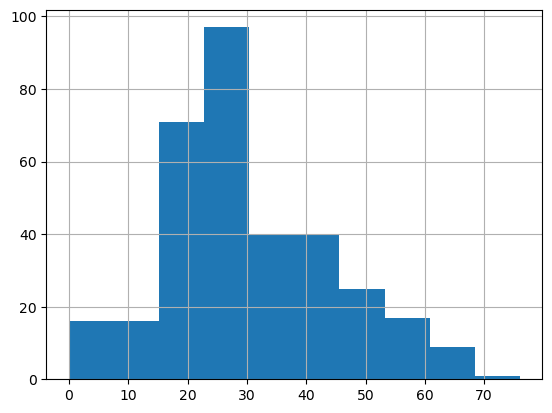

In [67]:
# what do you use to plot numerical distributions?
# IMPORTANT FOR PROJECT

titanicCopy['Age'].hist()

**.plot()**

Make plots of Series or DataFrame. 

The kind of plot to produce:
- ‘line’ : line plot (default)
- ‘bar’ : vertical bar plot
- ‘barh’ : horizontal bar plot
- ‘hist’ : histogram
- ‘box’ : boxplot
- ‘kde’ : Kernel Density Estimation plot
- ‘density’ : same as ‘kde’
- ‘area’ : area plot
- ‘pie’ : pie plot
- ‘scatter’ : scatter plot (DataFrame only)
- ‘hexbin’ : hexbin plot (DataFrame only)

<Axes: ylabel='Sex'>

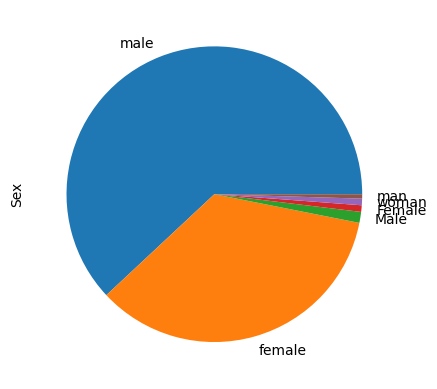

In [70]:
#pie chart or sex

titanicCopy['Sex'].value_counts().plot(kind='pie')

<Axes: ylabel='Survived'>

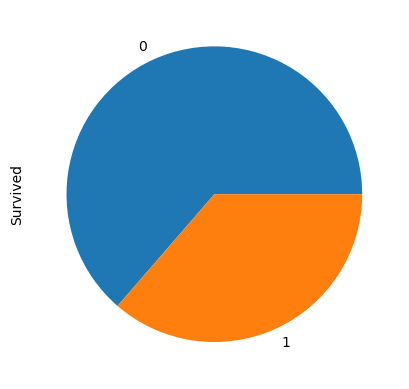

In [71]:
# pie chart for survived
titanicCopy['Survived'].value_counts().plot(kind='pie')

<Axes: ylabel='Cabin'>

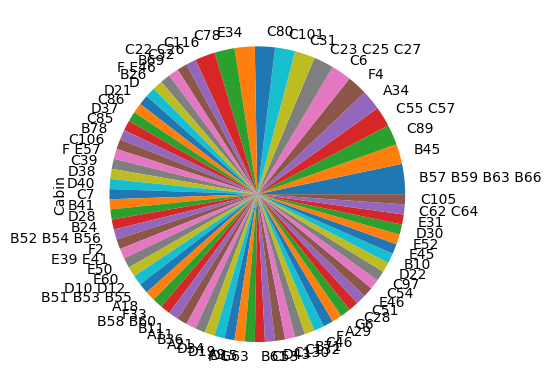

In [74]:
#what cabins were people in? 
titanicCopy['Cabin'].value_counts().plot(kind='pie')

In [77]:
titanicCopy['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

**.apply()**

Pandas.apply allow the users to pass a function and apply it on every single value of the Pandas series/column. 

In [75]:
import numpy as np

In [78]:
#write a function to get cabin code
def getCode(cabinCode):
  if pd.isnull(cabinCode):
    pass
  else:
    return str(cabinCode)[0]

In [81]:
# apply the function

titanicCopy['CabinCode'] = titanicCopy['Cabin'].apply(getCode)

In [83]:
# get the value counts

titanicCopy['CabinCode'].value_counts()

C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: CabinCode, dtype: int64

<Axes: >

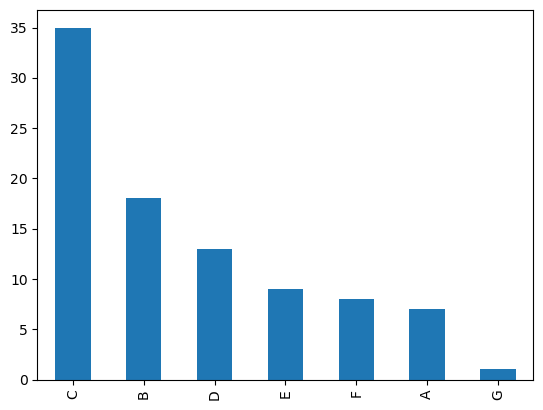

In [88]:
#create a histogram 
titanicCopy['CabinCode'].value_counts().plot(kind='bar')
# bar lowk better


**.cut()**

Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, or a pre-specified array of bins.

In [91]:
#get the different age rage 
ranges = [0,18,65,np.inf]
group_names = ['Minor', 'Adult', 'Senior']

In [ ]:
# Create AgeGroup column

titanicCopy['AgeGroup'] = pd.cut(titanicCopy['Age'], bins=ranges, labels=group_names)



In [93]:
#get the age group value counts
titanicCopy['AgeGroup'].value_counts()

Adult     273
Minor      55
Senior      2
Name: AgeGroup, dtype: int64

<Axes: ylabel='AgeGroup'>

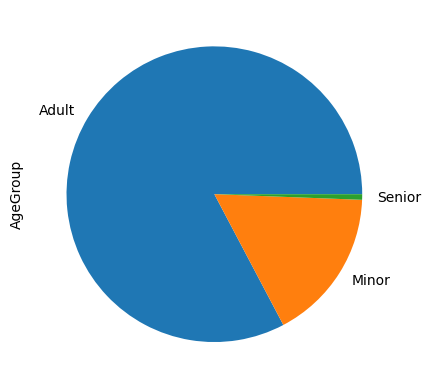

In [98]:
#pie chart age group
titanicCopy['AgeGroup'].value_counts().plot(kind='pie')


### Save the Data

**.to_csv()**

Write object to a comma-separated values (csv) file.

**to_excel()**

Write object to an Excel sheet.

To write a single object to an Excel .xlsx file it is only necessary to specify a target file name. To write to multiple sheets it is necessary to create an ExcelWriter object with a target file name, and specify a sheet in the file to write to.

Multiple sheets may be written to by specifying unique sheet_name. With all data written to the file it is necessary to save the changes. Note that creating an ExcelWriter object with a file name that already exists will result in the contents of the existing file being erased.


In [103]:
titanicCopy.to_csv("titanicClean.csv", index=False)

In [106]:
titanicCopy.to_excel("titanicClean.xlsx", index=False)

**pickle**

[documentaion](https://docs.python.org/3/library/pickle.html)

Python pickle module is used for serializing and de-serializing a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What Pickle does is it “serializes” the object first before writing it to a file. Pickling is a way to convert a Python object (list, dictionary, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another Python script. It provides a facility to convert any Python object to a byte stream. This Byte stream contains all essential information about the object so that it can be reconstructed, or “unpickled” and get back into its original form in any Python. 

It is often used with really large datasets

<u>Advantages of Using Pickle in Python</u>

- **Recursive objects** (objects containing references to themselves): Pickle keeps track of the objects it has already serialized, so later references to the same object won’t be serialized again. (The marshal module breaks for this.)
- **Object sharing** (references to the same object in different places): This is similar to self-referencing objects. Pickle stores the object once, and ensures that all other references point to the master copy. Shared objects remain shared, which can be very important for mutable objects.
- **User-defined** classes and their instances: Marshal does not support these at all, but Pickle can save and restore class instances transparently. The class definition must be importable and live in the same module as when the object was stored.


<u>Disadvatages of Using Pickle in Python</u>

- **Python Version Dependency** : Data of picle is so sensitive to the version of Python that produced. Pickled object created with one version of - Python that might not be unpickled with a various versions.
- **Non-Readbl** : The format of pickle is binary and not easily readable or editable by humans. The contracts that are in JSON or XML format can be easily modified.
- **Large data inefficiency** : Large datasets can slow down the pickling and unpickling. Serialization might be more appropriate for such use-cases.

In [108]:
import pickle

In [109]:
with open("titanicClean.pkl",'wb') as f:
    pickle.dump(titanicCopy,f)

In [107]:
#HAD TO GET BACK TO INTERNSHIP